<a href="https://colab.research.google.com/github/isammartins/analise_servidores_ufma/blob/main/An%C3%A1lise_dos_Servidores_UFMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Servidores UFMA

In [1]:
import pandas as pd
url = "http://dadosabertos.ufma.br/dataset/334d89c8-629f-49c5-aa06-171e35c1d33b/resource/d104f6db-dab8-4e14-86e3-7847d7b9b9e0/download/docentes_-_2025.csv"
df = pd.read_csv(url, sep=";", encoding="utf-8")
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df)

                              nome                                            unidade sexo       titulacao  Unnamed: 4
0         JEFFERSON MESQUITA BRITO              COORDENAÇÃO DO CURSO DE BIOLOGIA/CCCH    M       DOUTORADO         NaN
1       ANITA MARIA PEQUENO SOARES      DEPARTAMENTO DE SOCIOLOGIA E ANTROPOLOGIA/CCH    F       DOUTORADO         NaN
2     ANA CAROLINE FERREIRA SANTOS  COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENC...    F       DOUTORADO         NaN
3               MATEUS ALVES SILVA                  DEPARTAMENTO DE ARTES VISUAIS/CCH    M       DOUTORADO         NaN
4         ADIELSON CORREIA BOTELHO  COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENC...    M       DOUTORADO         NaN
...                            ...                                                ...  ...             ...         ...
2037            WALTER CEZAR NUNES  DEPARTAMENTO DE CIENCIAS CONTÁBEIS, IMOBILIÁRI...    M       DOUTORADO         NaN
2038            WILLAME BRAGA LIMA      COORDENA

## Explicando o código
`import pandas as pd`: Importando a biblioteca pandas

`url`: guardando numa variável o link direto pro arquivo .csv, esse link vem de um portal de dados públicos da UFMA.

`df = pd.read_csv(url, sep=";", encoding="utf-8")`:
- `pd.read_csv(...)`: lê o arquivo CSV e transforma num DataFrame, que é a tabela do Pandas.
- `url`: o caminho do arquivo.

- `sep=";"`: define que os valores dentro de cada linha estão separados por ponto e vírgula (e não por vírgula, que seria o padrão).

- `encoding="utf-8"`: diz como o texto está codificado para o padrão português, utf-8 é o padrão moderno, mas se der erro com acento, pode tentar trocar por "latin1".

Resultado: o arquivo vira uma tabela chamada df.

`pd.set_option('display.max_columns', None)`: mostra todas as colunas.

`pd.set_option('display.expand_frame_repr', False)`
Esse aqui é o que obriga o Pandas a mostrar a tabela numa linha só horizontalmente, mesmo se for gigante. Sem isso, ele quebra pra baixo, coluna por coluna, e fica parecendo um texto em vertical.




In [2]:
colunas = ['nome', 'unidade', 'sexo', 'titulacao']
df= pd.read_csv(url, sep=';', usecols=colunas)
print(df)

                              nome                                            unidade sexo       titulacao
0         JEFFERSON MESQUITA BRITO              COORDENAÇÃO DO CURSO DE BIOLOGIA/CCCH    M       DOUTORADO
1       ANITA MARIA PEQUENO SOARES      DEPARTAMENTO DE SOCIOLOGIA E ANTROPOLOGIA/CCH    F       DOUTORADO
2     ANA CAROLINE FERREIRA SANTOS  COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENC...    F       DOUTORADO
3               MATEUS ALVES SILVA                  DEPARTAMENTO DE ARTES VISUAIS/CCH    M       DOUTORADO
4         ADIELSON CORREIA BOTELHO  COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENC...    M       DOUTORADO
...                            ...                                                ...  ...             ...
2037            WALTER CEZAR NUNES  DEPARTAMENTO DE CIENCIAS CONTÁBEIS, IMOBILIÁRI...    M       DOUTORADO
2038            WILLAME BRAGA LIMA      COORDENAÇÃO DO CURSO DE ENGENHARIA CIVIL/CCBL    M  ESPECIALIZAÇÃO
2039                      YUKO ONO   

Existe um ponto e vírgula no final de cada linha. Isso significa que ao encontrar esse separador, a função read_csv ( ) entendeu que existiria mais uma coluna. Como não havia dados, a função criou uma coluna sem nome (Unnamed) e os valores da coluna foram interpretados como    **NaN    (Not a Number)**. Para resolver usamos o seguinte código:

1. `colunas = ['nome', 'unidade', 'sexo', 'titulacao']`: criando uma lista de strings que representam os nomes das colunas que quero importar do CSV.
2.  `df= pd.read_csv(url, sep=';', usecols=colunas)`:  diz pro Pandas carregar apenas as colunas da lista colunas.



In [3]:
df_unidade = df.unidade.value_counts().sort_values(ascending=False)
df_unidade

,count
unidade,
COLÉGIO UNIVERSITÁRIO,97
COORDENAÇÃO DO CURSO DE MEDICINA IMPERATRIZ/CCIM,65
COORDENAÇÃO DO CURSO DE MEDICINA PINHEIRO/CCPI,55
DEPARTAMENTO DE DIREITO/CCSO,52
DEPARTAMENTO DE LETRAS/CCH,51
...,...
CENTRO DE CIÊNCIAS SOCIAIS - CCSO,1
PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS AMBIENTAIS/CCCH,1
GERÊNCIA DE ENSINO E PESQUISA/HUSUP,1


O código acima conta quantas vezes cada valor aparece na coluna unidade e depois organiza do maior pro menor.

<Axes: xlabel='titulacao'>

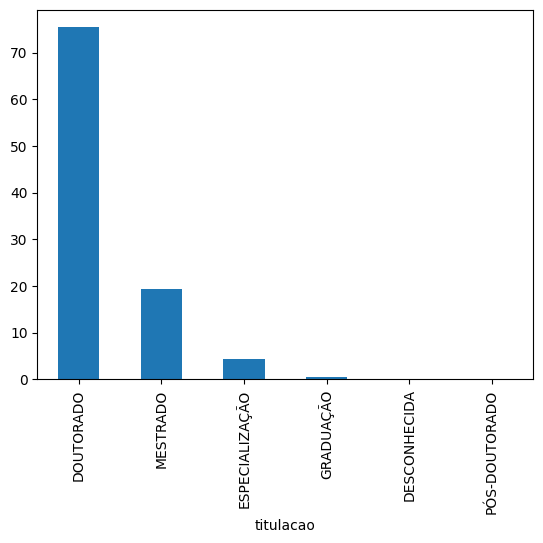

In [21]:
(df['titulacao'].value_counts(normalize=True)*100).plot(kind='bar')

Conta quantas vezes aparece cada valor naquela coluna, mas como proporção (não como número absoluto) e depois transforma em porcentagem. Além disso faz uma representação em um gráfico de barras (kind = "bar").

In [28]:
df[df['titulacao'].isin(['PÓS-DOUTORADO', 'DESCONHECIDA'])]

,nome,unidade,sexo,titulacao
10,ALECSANDRO JOSE PRUDENCIO RATTS,COORDENACAO DO CURSO DE ESTUDOS AFRICANOS E AF...,M,DESCONHECIDA
303,DEYSIELLE COSTA DAS CHAGAS,DEPARTAMENTO DE FILOSOFIA/CCH,F,DESCONHECIDA
1121,EMILIE GENEVIEVE AUDIGIER,DEPARTAMENTO DE LETRAS/CCH,F,PÓS-DOUTORADO


Filtra o DataFrame df e retorna somente as linhas onde a coluna 'titulacao' tem o valor 'PÓS-DOUTORADO' ou 'DESCONHECIDA'.

In [32]:
df['titulacao']= df['titulacao'].replace('PÓS-DOUTORADO', 'DOUTORADO')
df['titulacao'].value_counts(normalize=True)*100

,proportion
titulacao,
DOUTORADO,75.465230
MESTRADO,19.343781
ESPECIALIZAÇÃO,4.456415
GRADUAÇÃO,0.636631
DESCONHECIDA,0.097943


Substitui todos os valores "PÓS-DOUTORADO" por "DOUTORADO" na coluna 'titulacao'. Depois conta a frequência relativa (proporção) de cada tipo de titulação no DataFrame — agora com o pós-doc somado aos doutorados — e multiplica por 100 pra transformar em porcentagem.

In [33]:
(df.groupby('unidade')['titulacao'].value_counts(normalize=True)*100).round(1)

unidade                                           titulacao     
CENTRO DE CIÊNCIAS DE IMPERATRIZ - CCIM           DOUTORADO         100.0
CENTRO DE CIÊNCIAS SOCIAIS - CCSO                 DOUTORADO         100.0
COLÉGIO UNIVERSITÁRIO                             MESTRADO           55.7
                                                  DOUTORADO          29.9
                                                  ESPECIALIZAÇÃO      9.3
                                                                    ...  
PROGRAMA DE PÓS-GRADUAÇÃO EM LETRAS - BACABAL     DOUTORADO         100.0
PROGRAMA DE PÓS-GRADUAÇÃO EM ODONTOLOGIA/CCBS     DOUTORADO         100.0
PROGRAMA DE PÓS-GRADUAÇÃO EM SAÚDE COLETIVA/CCBS  DOUTORADO         100.0
PRÓ-REITORIA DE ENSINO - PROEN                    DOUTORADO         100.0
SUPERINTENDÊNCIA DE TECNOLOGIAS NA EDUCAÇÃO/STED  DOUTORADO         100.0
Name: proportion, Length: 222, dtype: float64

Ele calcula a porcentagem de cada titulação dentro de cada unidade e arredonda o resultado pra 1 casa decimal.

Etapas:

`df.groupby('unidade')`

Agrupa os dados por unidade.

`['titulacao'].value_counts(normalize=True)`

Dentro de cada grupo (ou seja, dentro de cada unidade), ele conta quantas vezes cada titulação aparece, como proporção.

`* 100`

Converte a proporção em porcentagem.

`.round(1)`

Arredonda os valores pra uma casa decimal.



In [38]:
df_sexo_titulacao= (df.groupby('sexo')['titulacao'].value_counts(normalize=True)*100).round(1)
df_sexo_titulacao.unstack()

titulacao,DESCONHECIDA,DOUTORADO,ESPECIALIZAÇÃO,GRADUAÇÃO,MESTRADO
sexo,,,,,
F,0.1,74.4,4.1,0.7,20.7
M,0.1,76.5,4.8,0.6,18.0


`df_sexo_titulacao = (df.groupby('sexo')['titulacao'].value_counts(normalize=True) * 100).round(1)`:
Isso gera a porcentagem de cada tipo de titulação dentro de cada grupo de sexo (por exemplo: "entre os homens, x% têm doutorado"). Resultado é uma Series com MultiIndex (sexo → titulação). Percentuais somam 100% dentro de cada grupo de sexo

`df_sexo_titulacao.unstack()`: Transforma o resultado em uma tabela com os sexos nas linhas e as titulações nas colunas.

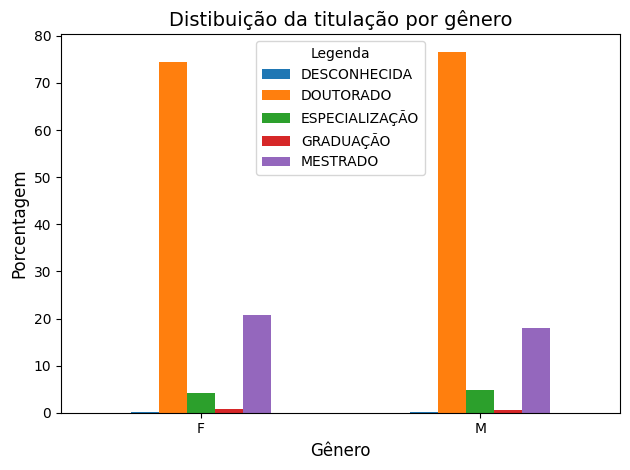

In [73]:
import matplotlib.pyplot as plt
df_sexo_titulacao.unstack().plot(kind='bar')
plt.title('Distibuição da titulação por gênero', fontsize =14) # Adiciona o título do gráfico, com tamanho da fonte 14.
plt.xlabel('Gênero', fontsize =12) # Coloca o rótulo no eixo X ("Gênero"), com fonte tamanho 12.
plt.ylabel('Porcentagem', fontsize =12) # Rótulo no eixo Y ("Porcentagem"), também com fonte 12.
plt.legend(title = 'Legenda', fontsize=10) # Adiciona uma legenda explicando o que cada barra representa (cada cor = uma titulação).
# Também dá um título pra legenda ("Legenda") e define tamanho da fonte.
plt.xticks(rotation=0) # Deixa os rótulos do eixo X (os gêneros) na horizontal, o que facilita a leitura.
plt.tight_layout() # Ajusta o espaçamento automático do gráfico pra evitar que textos ou elementos fiquem cortados ou colados.
plt.show() # Exibe o gráfico na tela.


🔹 `df_sexo_titulacao.unstack().plot(kind='bar')`
- `df_sexo_titulacao`: é uma Series com índice duplo (sexo, titulacao), foi criada antes com groupby.

- `unstack()`: transforma numa tabela com sexo nas linhas e titulacao nas colunas.

- `plot(kind='bar')`: faz um gráfico de barras verticais.

📊 Resultado: um gráfico onde cada grupo (linha) é um gênero, com várias barras representando as porcentagens de titulação.



In [54]:
df_sexo_unidade = (df.groupby('unidade')['sexo'].value_counts(normalize=True)*100).round(1).unstack().fillna(0).head(10)
df_sexo_unidade

sexo,F,M
unidade,,
CENTRO DE CIÊNCIAS DE IMPERATRIZ - CCIM,100.0,0.0
CENTRO DE CIÊNCIAS SOCIAIS - CCSO,0.0,100.0
COLÉGIO UNIVERSITÁRIO,58.8,41.2
COORDENACAO DO CURSO DE DIREITO/CCIM,40.0,60.0
COORDENACAO DO CURSO DE ENGENHARIA CIVIL/CCET,41.7,58.3
COORDENACAO DO CURSO DE ENGENHARIA DA COMPUTACAO/CCET,12.5,87.5
COORDENACAO DO CURSO DE ENGENHARIA MECANICA/CCET,16.7,83.3
COORDENACAO DO CURSO DE ESTUDOS AFRICANOS E AFRO-BRASILEIROS/DCCH,53.8,46.2
COORDENACAO DO CURSO DE LICENCIATURAS EM CIENCIAS HUMANAS IMPERATRIZ/CCIM,21.4,78.6


O objetivo é mostrar a porcentagem de cada sexo por unidade, e pegar só as 10 primeiras unidades da tabela final.

`🔹 .unstack()`

Transforma os valores de 'sexo' (F, M etc) em colunas.

`🔹 .fillna(0)`

Caso alguma unidade só tenha um sexo presente (ex: só F), isso preenche o outro com zero pra não deixar como NaN.

In [67]:
df_mais_mulheres = df_sexo_unidade[df_sexo_unidade['F'] > df_sexo_unidade['M']]
df_mais_mulheres

sexo,F,M
unidade,,
CENTRO DE CIÊNCIAS DE IMPERATRIZ - CCIM,1.0,0.0
COLÉGIO UNIVERSITÁRIO,57.0,40.0
COORDENACAO DO CURSO DE ESTUDOS AFRICANOS E AFRO-BRASILEIROS/DCCH,7.0,6.0
COORDENAÇÃO DO CURSO DE ENFERMAGEM PINHEIRO/CCPI,16.0,5.0
COORDENAÇÃO DO CURSO DE ENFERMAGEM/CCIM,28.0,10.0
COORDENAÇÃO DO CURSO DE ENGENHARIA AMBIENTAL E SANITÁRIA/CCBL,5.0,2.0
COORDENAÇÃO DO CURSO DE JORNALISMO/CCIM,14.0,8.0
COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENCIAS HUMANAS/CODÓ,8.0,5.0
COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENCIAS NATURAIS/GRAJAÚ,7.0,6.0



Filtra só as unidades em que a porcentagem de pessoas do sexo feminino (F) é maior que a de masculino (M).

In [68]:
df_mais_homens = df_sexo_unidade[df_sexo_unidade['M'] > df_sexo_unidade['F']]
df_mais_homens

sexo,F,M
unidade,,
CENTRO DE CIÊNCIAS SOCIAIS - CCSO,0.0,1.0
COORDENACAO DO CURSO DE DIREITO/CCIM,6.0,9.0
COORDENACAO DO CURSO DE ENGENHARIA CIVIL/CCET,5.0,7.0
COORDENACAO DO CURSO DE ENGENHARIA DA COMPUTACAO/CCET,2.0,14.0
COORDENACAO DO CURSO DE ENGENHARIA MECANICA/CCET,2.0,10.0
COORDENACAO DO CURSO DE LICENCIATURAS EM CIENCIAS HUMANAS IMPERATRIZ/CCIM,3.0,11.0
COORDENACAO DO CURSO DE LICENCIATURAS EM CIENCIAS NATURAIS BACABAL/CCBA,0.0,8.0
COORDENACAO DO CURSO DE LICENCIATURAS EM CIENCIAS NATURAIS IMPERATRIZ/CCIM,2.0,10.0
COORDENACAO DO CURSO DE ZOOTECNIA/CCCH,8.0,12.0


Filtra só as unidades em que a porcentagem de pessoas do sexo masculino (M) é maior que a de feminino (F).

In [69]:
df_empates = df_sexo_unidade[df_sexo_unidade['F'] == df_sexo_unidade['M']]
df_empates

sexo,F,M
unidade,,
COORDENAÇÃO DO CURSO DE ENGENHARIA AMBIENTAL E SANITÁRIA/CCET,4.0,4.0
COORDENAÇÃO DO CURSO DE LETRAS BACABAL/CCBA,5.0,5.0
COORDENAÇÃO DO CURSO DE LICENCIATURAS EM CIENCIAS NATURAIS - QUIMICA/SÃO BERNARDO/CCSB,7.0,7.0
COORDENAÇÃO LICENCIATURA EM EDUCAÇÃO DO CAMPO - BACABAL/CCBA,9.0,9.0
DEPARTAMENTO DE DESENHO E TECNOLOGIA/CCET,10.0,10.0
DEPARTAMENTO DE PATOLOGIA/CCBS,11.0,11.0
PROGRAMA DE PÓS-GRADUAÇÃO EM DIREITO E INSTITUIÇÕES DO SISTEMA DE JUSTIÇA/CCSO,1.0,1.0


Esse filtro aqui pega só as linhas em que F == M, ou seja, unidades com igualdade de gênero perfeita.

In [70]:
# Totais
total_unidades = df['unidade'].nunique()

print(f"Total de unidades: {total_unidades}")
print(f"Unidades com mais mulheres: {len(df_mais_mulheres)}")
print(f"Unidades com mais homens: {len(df_mais_homens)}")
print(f"Unidades empatadas: {len(df_empates)}")
print(f"Soma total (mulheres + homens + empates): {len(df_mais_mulheres) + len(df_mais_homens) + len(df_empates)}")

Total de unidades: 107
Unidades com mais mulheres: 41
Unidades com mais homens: 59
Unidades empatadas: 7
Soma total (mulheres + homens + empates): 107
